# Breast Cancer Wisconsing

<img src="../images/breast_cancer_winsconsin.png">

# In Brief
This dataset contains characteristics derived from digitized imaging of fine needle aspirates of a breast tumor cell mass.  The goal of this analysis is to train a machine leanring algorightms to accurately distinguish between a benign and malignant tumor to aid in clinical diagnosis.

Ten real-valued features were computed for each cell nucleus: 

* a) radius (mean of distances from center to points on the perimeter) 
* b) texture (standard deviation of gray-scale values) 
* c) perimeter 
* d) area 
* e) smoothness (local variation in radius lengths) 
* f) compactness (perimeter^2 / area - 1.0) 
* g) concavity (severity of concave portions of the contour) 
* h) concave points (number of concave portions of the contour) 
* i) symmetry 
* j) fractal dimension ("coastline approximation" - 1)

Original Dataset is available at the [UCA Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))

# Exploratory data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data from a csv file
df = pd.read_csv('../datasets/breast_cancer_wisconsin.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [1]:
sns.countplot(x='diagnosis', data=df)

NameError: name 'sns' is not defined

In [11]:
import pandas as pd

d = {'col1': ['a', 'b'], 'col2': ['c', 'd']}
df = pd.DataFrame(data=d)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(df)
le.classes_

ValueError: bad input shape (2, 2)

## Visualización de los datos

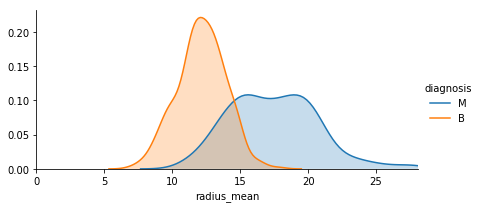

In [6]:
sns_plt = sns.FacetGrid(df, hue="diagnosis",aspect=2)
sns_plt.map(sns.kdeplot,'radius_mean',shade= True)
sns_plt.set(xlim=(0, df['radius_mean'].max()))
sns_plt.add_legend()

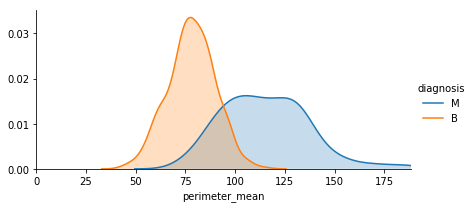

In [7]:
sns_plt = sns.FacetGrid(df, hue="diagnosis",aspect=2)
sns_plt.map(sns.kdeplot,'perimeter_mean',shade= True)
sns_plt.set(xlim=(0, df['perimeter_mean'].max()))
sns_plt.add_legend()

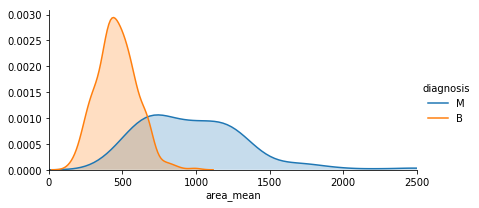

In [8]:
sns_plt = sns.FacetGrid(df, hue="diagnosis",aspect=2)
sns_plt.map(sns.kdeplot,'area_mean',shade= True)
sns_plt.set(xlim=(0, df['area_mean'].max()))
sns_plt.add_legend()

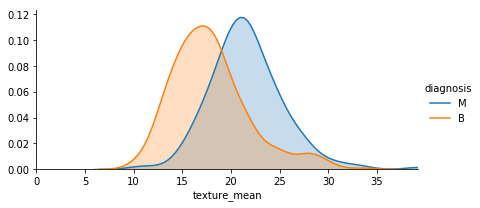

In [9]:
sns_plt = sns.FacetGrid(df, hue="diagnosis",aspect=2)
sns_plt.map(sns.kdeplot,'texture_mean',shade= True)
sns_plt.set(xlim=(0, df['texture_mean'].max()))
sns_plt.add_legend()

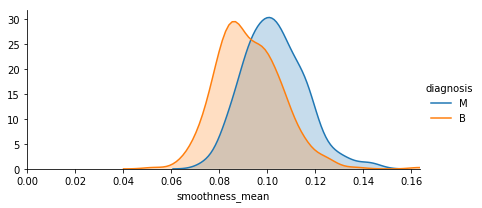

In [10]:
sns_plt = sns.FacetGrid(df, hue="diagnosis",aspect=2)
sns_plt.map(sns.kdeplot,'smoothness_mean',shade= True)
sns_plt.set(xlim=(0, df['smoothness_mean'].max()))
sns_plt.add_legend()

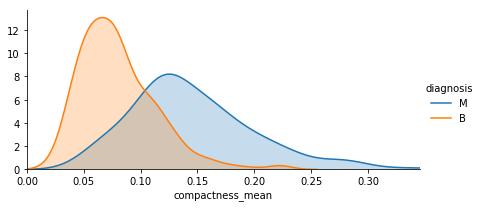

In [11]:
sns_plt = sns.FacetGrid(df, hue="diagnosis",aspect=2)
sns_plt.map(sns.kdeplot,'compactness_mean',shade= True)
sns_plt.set(xlim=(0, df['compactness_mean'].max()))
sns_plt.add_legend()

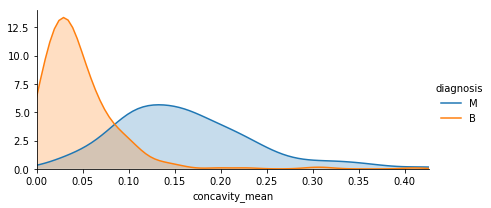

In [12]:
sns_plt = sns.FacetGrid(df, hue="diagnosis",aspect=2)
sns_plt.map(sns.kdeplot,'concavity_mean',shade= True)
sns_plt.set(xlim=(0, df['concavity_mean'].max()))
sns_plt.add_legend()

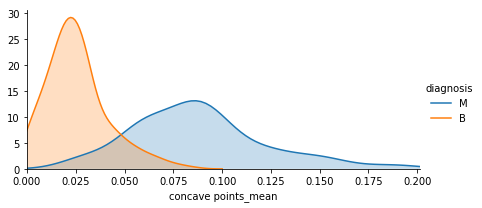

In [13]:
sns_plt = sns.FacetGrid(df, hue="diagnosis",aspect=2)
sns_plt.map(sns.kdeplot,'concave points_mean',shade= True)
sns_plt.set(xlim=(0, df['concave points_mean'].max()))
sns_plt.add_legend()

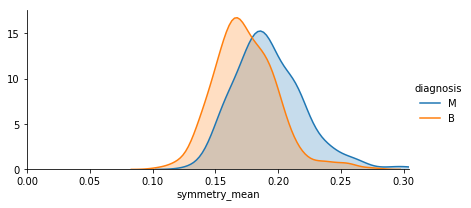

In [14]:
sns_plt = sns.FacetGrid(df, hue="diagnosis",aspect=2)
sns_plt.map(sns.kdeplot,'symmetry_mean',shade= True)
sns_plt.set(xlim=(0, df['symmetry_mean'].max()))
sns_plt.add_legend()

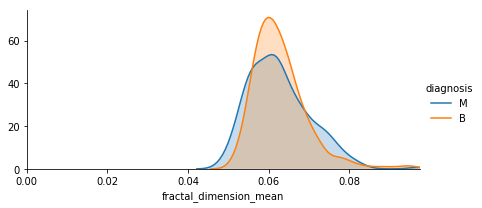

In [15]:
sns_plt = sns.FacetGrid(df, hue="diagnosis",aspect=2)
sns_plt.map(sns.kdeplot,'fractal_dimension_mean',shade= True)
sns_plt.set(xlim=(0, df['fractal_dimension_mean'].max()))
sns_plt.add_legend()

## Preprocesamiento

### Valores nulos

In [16]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Unnamed: 32,569,100.0
area_se,0,0.0
diagnosis,0,0.0
radius_mean,0,0.0
texture_mean,0,0.0


Como `unnamed: 32` parece una columna errónea, la vamos a eliminar del dataset

In [17]:
df.drop(['Unnamed: 32'], 1, inplace=True)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Detección de outliers

## Datos categóricos

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

La variable `diagnosis` es de tipo texto

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['diagnosis'] = le.fit_transform(df['diagnosis'])

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Selección de variables

In [20]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [21]:
df.drop(['id'], 1, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Vamos a probar con los valores medios de las variables

In [22]:
df.drop([column for column in df.columns if 'mean' not in column and column != 'diagnosis'], 1, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


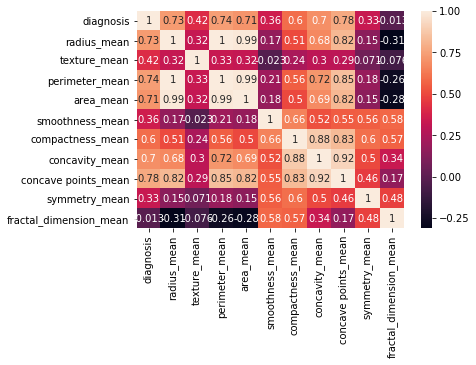

In [23]:
sns.heatmap(df.corr(), annot=True, cbar=True)

- Como ya veíamos en el análisis inicial, las variables de radius, perimeter y área están fuertemente correladas. 
- Además, vemos que el el `concavity_mean` está correlado con el `concave points mean`

In [24]:
df.drop(['radius_mean', 'perimeter_mean', 'concave points_mean'], 1, inplace=True)
df.head()

,diagnosis,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
0,1,10.38,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871
1,1,17.77,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667
2,1,21.25,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999
3,1,20.38,386.1,0.14250,0.28390,0.2414,0.2597,0.09744
4,1,14.34,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883


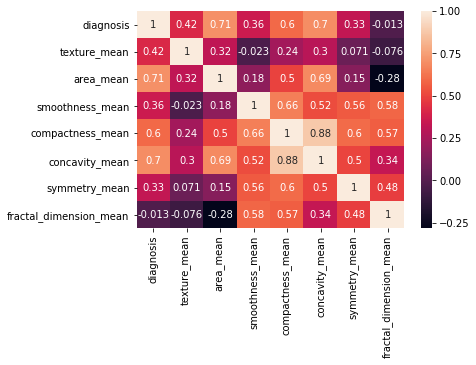

In [25]:
sns.heatmap(df.corr(), annot=True, cbar=True)

## Distintos órdenes de magnitud

In [26]:
from sklearn.preprocessing import Normalizer

df_back = df

# Instantiate 
norm = Normalizer(norm='l1')

# Fit
norm.fit(df.drop(['diagnosis'], 1).values)

# Transform both training and testing sets
df_norm = pd.DataFrame(norm.transform(df.drop(['diagnosis'], 1).values), columns=df.columns[1:])
df_norm['diagnosis'] = df.diagnosis
df_norm.head()

,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,diagnosis
0,0.010253,0.988743,0.000117,0.000274,0.000296,0.000239,0.000078,1
1,0.013219,0.986418,0.000063,0.000059,0.000065,0.000135,0.000042,1
2,0.017347,0.982054,0.000089,0.000131,0.000161,0.000169,0.000049,1
3,0.050012,0.947473,0.000350,0.000697,0.000592,0.000637,0.000239,1
4,0.010930,0.988559,0.000076,0.000101,0.000151,0.000138,0.000045,1


# Entrenando los modelos

In [27]:
from sklearn.model_selection import train_test_split

X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Regresión logística

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9415204678362573
[[108   0]
 [ 10  53]]


## Naïve Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

gaussian = GaussianNB() 
gaussian.fit(X_train, y_train)  

y_pred = gaussian.predict(X_test)  

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9415204678362573
[[106   2]
 [  8  55]]


## Decision tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train) 

y_pred = decision_tree.predict(X_test)  

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9415204678362573
[[101   7]
 [  3  60]]


## Random forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9824561403508771
[[107   1]
 [  2  61]]


In [32]:
importances = pd.DataFrame({'feature':X_train.columns, 
                            'importance':np.round(random_forest.feature_importances_, 3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
area_mean,0.317
concavity_mean,0.268
compactness_mean,0.138
texture_mean,0.109
fractal_dimension_mean,0.066
smoothness_mean,0.059
symmetry_mean,0.042


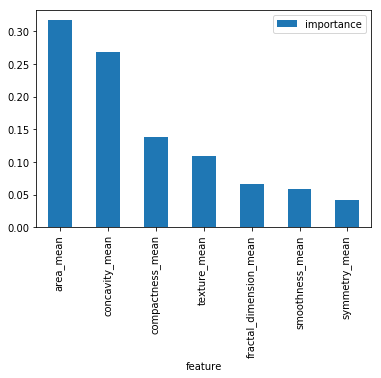

In [33]:
importances.plot.bar()

## Support Vector Machines

In [34]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix

linear_svc = LinearSVC(max_iter=1000000)
linear_svc.fit(X_train, y_train)

y_pred = linear_svc.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9532163742690059
[[106   2]
 [  6  57]]


/home/alicia/workspace/intro_ml_python/venv/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## K Nearest Neighbors

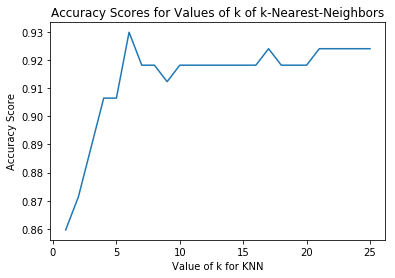

In [35]:
from sklearn.neighbors import KNeighborsClassifier

# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix

knn = KNeighborsClassifier(n_neighbors = 6) 
knn.fit(X_train, y_train)  

y_pred = knn.predict(X_test)  

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9298245614035088
[[107   1]
 [ 11  52]]
